# 생활인구 데이터 홈페이지
https://data.seoul.go.kr/dataVisual/seoul/seoulLivingPopulation.do

In [52]:
import os
import json
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜와 시간을 지정

In [185]:
when = '20181224'
time = 22

## 행정동 코드를 실제 동이름과 mapping

In [ ]:
data_path = '/home/zimin/datasets/seoul/'
geo_path = data_path + 'skorea_submunicipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str['features'] = [i for i in geo_str['features'] if i['properties']['code'][:2] == '11']

analysis = datetime.datetime(int(when[:4]), int(when[4:6]) , int(when[-2:]) , time)
week = {0 : '월요일', 1 : '화요일', 2 : '수요일', 3 : '목요일', 4 : '금요일', 5 : '토요일', 6 : '일요일'}
weekday = week[analysis.weekday()]
date = str(analysis.year) + str(analysis.month) + str(analysis.day) 

In [219]:
weekday, date

('월요일', '20181224')

In [216]:
local = pd.read_csv(os.path.join(data_path, 'LOCAL_PEOPLE_' + when + '.csv'))

## 행정동코드를 통계청행정동 코드로 mapping

In [220]:

mapping = pd.read_csv(os.path.join(data_path,'행정동코드_매핑정보_2018.csv'))
mapping.drop(0, axis =0, inplace = True)

check_local = np.unique( local.iloc[:,2].values) # 생활인구데이터 행정동코드 
name_dict = {i : mapping[mapping['행자부행정동코드'] == str(i)].iloc[:,4].values[0] for i in check_local} # 행정동코드를 행정동 이름으로
map_dict = {i : str(mapping[mapping['행자부행정동코드'] == str(i)].iloc[:,0].values[0]) for i in check_local} # 행정동코드를 통계청행정동 코드로

local['행정동이름'] = local['행정동코드'].apply(lambda x : name_dict[x])
local['행정동코드'] = local['행정동코드'].apply(lambda x : map_dict[x])

### column name을 보기 편하게 설정
집계구코드는 필요에 따라 사용여부 결정, 이 코드에서는 사용하지 않음

In [223]:
local = local[['기준일ID',
 '시간대구분',
 '행정동코드',
 '행정동이름',
 '총생활인구수',
 '남자10세부터14세생활인구수',
 '남자15세부터19세생활인구수',
 '남자20세부터24세생활인구수',
 '남자25세부터29세생활인구수',
 '남자30세부터34세생활인구수',
 '남자35세부터39세생활인구수',
 '남자40세부터44세생활인구수',
 '남자45세부터49세생활인구수',
 '남자50세부터54세생활인구수',
 '남자55세부터59세생활인구수',
 '남자60세부터64세생활인구수',
 '남자65세부터69세생활인구수',
 '남자70세이상생활인구수',
 '여자10세부터14세생활인구수',
 '여자15세부터19세생활인구수',
 '여자20세부터24세생활인구수',
 '여자25세부터29세생활인구수',
 '여자30세부터34세생활인구수',
 '여자35세부터39세생활인구수',
 '여자40세부터44세생활인구수',
 '여자45세부터49세생활인구수',
 '여자50세부터54세생활인구수',
 '여자55세부터59세생활인구수',
 '여자60세부터64세생활인구수',
 '여자65세부터69세생활인구수',
 '여자70세이상생활인구수']]

In [224]:
prev1 = [ '남자10세부터14세생활인구수',
 '남자15세부터19세생활인구수',
 '남자20세부터24세생활인구수',
 '남자25세부터29세생활인구수',
 '남자30세부터34세생활인구수',
 '남자35세부터39세생활인구수',
 '남자40세부터44세생활인구수',
 '남자45세부터49세생활인구수',
 '남자50세부터54세생활인구수',
 '남자55세부터59세생활인구수',
 '남자60세부터64세생활인구수',
 '남자65세부터69세생활인구수',
 '남자70세이상생활인구수']
prev2 =[
 '여자10세부터14세생활인구수',
 '여자15세부터19세생활인구수',
 '여자20세부터24세생활인구수',
 '여자25세부터29세생활인구수',
 '여자30세부터34세생활인구수',
 '여자35세부터39세생활인구수',
 '여자40세부터44세생활인구수',
 '여자45세부터49세생활인구수',
 '여자50세부터54세생활인구수',
 '여자55세부터59세생활인구수',
 '여자60세부터64세생활인구수',
 '여자65세부터69세생활인구수',
 '여자70세이상생활인구수']

In [225]:
local[prev1 + prev2] = local[prev1 + prev2].replace('*',0)
local[prev1 + prev2] = local[prev1 + prev2].astype(int)

/home/zimin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [227]:
local = local.groupby(['행정동이름','행정동코드','기준일ID','시간대구분']).sum()

In [229]:
after1 = {i : 110+5*j for j,i in enumerate(prev1)}
after2 = {i : 210+5*j for j,i in enumerate(prev2)}
after = dict(after1, **after2)

In [230]:
local.rename(columns = after, inplace=True)
local.to_csv(os.path.join(data_path, 'pre_local_PEOPLE_' + date + '.csv'))

# 간단한 분석 예시
### 날짜에 따라서 종로에 사람이 얼마나 있었는지
17,24,31,30 데이터가 있어야 함
https://data.seoul.go.kr/dataVisual/seoul/seoulLivingPopulation.do

In [231]:
a17 = pd.read_csv(os.path.join(data_path, 'pre_local_PEOPLE_' + '20181217' + '.csv'))
a24 = pd.read_csv(os.path.join(data_path, 'pre_local_PEOPLE_' + '20181224' + '.csv'))
a31 = pd.read_csv(os.path.join(data_path, 'pre_local_PEOPLE_' + '20181231' + '.csv'))
a30 = pd.read_csv(os.path.join(data_path, 'pre_local_PEOPLE_' + '20181230' + '.csv'))

In [151]:
b17 = a17[(a17['행정동이름'] == '종로1.2.3.4가동') & (a17['시간대구분'].isin([21,22,23]))]
b24 = a24[(a24['행정동이름'] == '종로1.2.3.4가동') & (a24['시간대구분'].isin([21,22,23]))]
b30 = a30[(a30['행정동이름'] == '종로1.2.3.4가동') & (a30['시간대구분'].isin([21,22,23]))]
b31 = a31[(a31['행정동이름'] == '종로1.2.3.4가동') & (a31['시간대구분'].isin([21,22,23]))]

In [199]:
merged = pd.concat([b17, b24, b30, b31])
merged['days'] = merged['기준일ID']

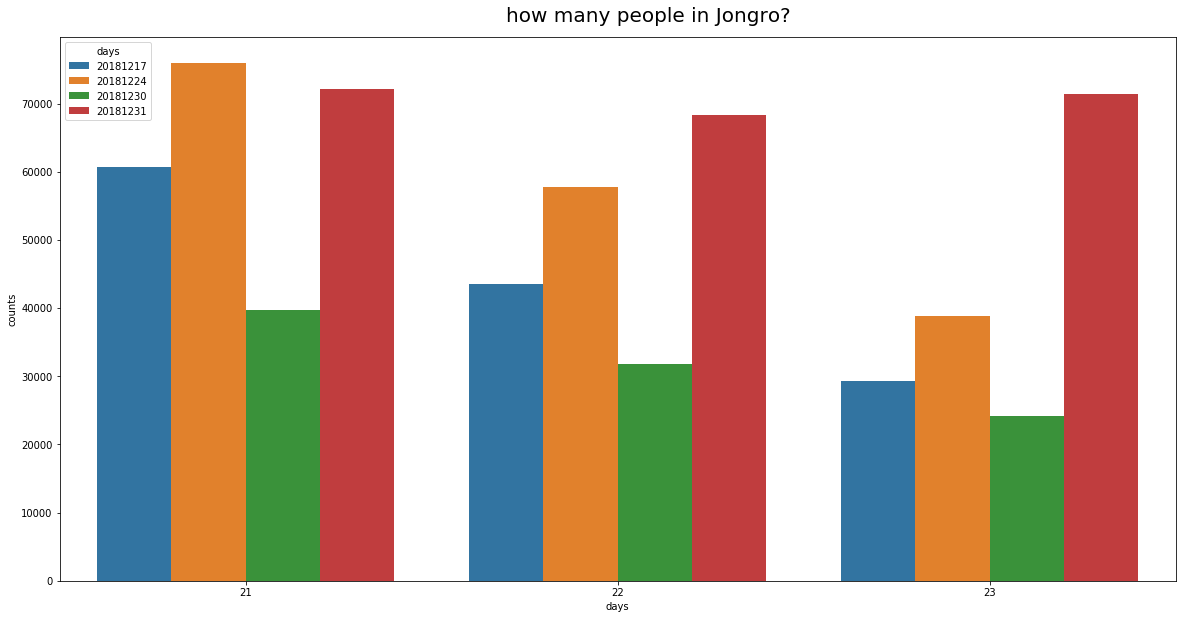

In [212]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x="시간대구분", y="총생활인구수", data=merged, hue = 'days')
plt.text(0.7,82000,'how many people in Jongro?', fontsize = 20)
plt.xlabel('days')
plt.ylabel('counts')
plt.show()